# Start

Import Statements

In [1]:
import numpy as np # linear Algebra
import pandas as pd # Data Pre-processing 
import sklearn # Training

import os
import sys

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Import Neural Network and PyTorch Libraries

In [2]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as f
import torch.optim as optim

Test if Torch works

In [3]:
if torch.cuda.is_available():
    device = torch.device('cuda')
    print("CUDA is available. Using GPU.")
else:
    device = torch.device('cpu')
    print("CUDA is not available. Using CPU.")

CUDA is not available. Using CPU.


# Importing Data

Import dataset

In [4]:
df_train = pd.read_csv('all_train.tsv' , sep='\t')
# Validate that data has been read
print("Training data read")

df_validate = pd.read_csv('all_validate.tsv', sep='\t')
# Validate that data has been read
print("Validation data read")

df_test = pd.read_csv('all_test_public.tsv', sep='\t')
# Validate that data has been read
print("Test data read")

Training data read
Validation data read
Test data read


Let's see what data we have

In [5]:
df_train.head()
df_validate.head()
df_test.head()

,Unnamed: 0.2,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,author,clean_title,created_utc,domain,hasImage,id,image_url,linked_submission_id,num_comments,score,subreddit,title,upvote_ratio,2_way_label,3_way_label,6_way_label
0,0,0,NaN,NaN,buzzly6,virginia first lady criticized for handing cot...,1.551316e+09,philly.com,False,avkxum,NaN,NaN,2.0,16,nottheonion,Virginia first lady criticized for handing cot...,0.69,1,0,0
1,1,1,NaN,NaN,NaN,jason falconer reluctant hero stopped mall att...,1.474326e+09,cnn.it,False,53kdz3,NaN,NaN,0.0,7,upliftingnews,Jason Falconer: Reluctant hero stopped mall at...,0.77,1,0,0
2,2,2,75691.0,335711.0,myternity,NaN,1.497067e+09,NaN,True,diperbi,http://i.imgur.com/cSIuEVF.jpg,6gc83w,NaN,3,psbattle_artwork,NaN,NaN,0,2,4
3,3,3,NaN,NaN,NaN,woman bites camels testicles to save herself a...,1.569178e+09,wbrz.com,False,d7upss,NaN,NaN,3.0,7,nottheonion,Woman bites camel’s testicles to save herself ...,1.00,1,0,0
4,4,4,190207.0,862707.0,trustbytrust,stargazer,1.425139e+09,NaN,True,cozywbv,http://i.imgur.com/BruWKDi.jpg,2xct9d,NaN,3,psbattle_artwork,stargazer,NaN,0,2,4


Remove the columns for "2-way" and "3-way" classification
Remove the column "title" since we already have the "clear_title" column

In [6]:
# List of columns to keep
columns_to_keep = ['author', 'clean_title', '2_way_label']

# For df_train
try:
    # Select only the columns you want to keep
    selected_df = df_train[columns_to_keep]
    
    # Specify the output file path (change this to your desired file path)
    output_file = 'all_train_cleaned.tsv'
    
    # Overwrite the original TSV file with the modified DataFrame
    selected_df.to_csv(output_file, sep='\t', index=False)
    
    # Validate that columns have been removed
    print(f"Processed and saved back to {output_file}")
except KeyError as e:
    print(f"One or more columns not found: {e}")

# For df_validate 
try:
    # Select only the columns you want to keep
    selected_df = df_validate[columns_to_keep]
    
    # Specify the output file path (change this to your desired file path)
    output_file = 'all_validate_cleaned.tsv'
    
    # Overwrite the original TSV file with the modified DataFrame
    selected_df.to_csv(output_file, sep='\t', index=False)
    
    # Validate that columns have been removed
    print(f"Processed and saved back to {output_file}")
except KeyError as e:
    print(f"One or more columns not found: {e}")

# For #df_test
try:
    # Select only the columns you want to keep
    selected_df = df_test[columns_to_keep]
    
    # Specify the output file path (change this to your desired file path)
    output_file = 'all_test_cleaned.tsv'
    
    # Overwrite the original TSV file with the modified DataFrame
    selected_df.to_csv(output_file, sep='\t', index=False)
    
    # Validate that columns have been removed
    print(f"Processed and saved back to {output_file}")
except KeyError as e:
    print(f"One or more columns not found: {e}")

Processed and saved back to all_train_cleaned.tsv
Processed and saved back to all_validate_cleaned.tsv
Processed and saved back to all_test_cleaned.tsv


Check that data looks correct  
Note that df_train, df_validate and df_test are redefined here!

In [7]:
df_train = pd.read_csv('all_train_cleaned.tsv' , sep='\t')
# Validate that data has been read
print("Training data read")

df_validate = pd.read_csv('all_validate_cleaned.tsv', sep='\t')
# Validate that data has been read
print("Validation data read")

df_test = pd.read_csv('all_test_cleaned.tsv', sep='\t')
# Validate that data has been read
print("Test data read")

df_train.head()
df_validate.head()
df_test.head()

Training data read
Validation data read
Test data read


,author,clean_title,2_way_label
0,buzzly6,virginia first lady criticized for handing cot...,1
1,NaN,jason falconer reluctant hero stopped mall att...,1
2,myternity,NaN,0
3,NaN,woman bites camels testicles to save herself a...,1
4,trustbytrust,stargazer,0


Check number of columns

In [8]:
df_train.shape

(878218, 3)

In [ ]:
df_validate.shape

In [ ]:
df_test.shape

Remove NaN values

In [9]:
# For train set
df_train_clean = df_train.dropna(subset=['clean_title'])
df_train_clean.reset_index(drop = True, inplace = True)

# For test set
df_test_clean = df_test.dropna(subset=['clean_title'])
df_test_clean.reset_index(drop = True, inplace = True)
df_test = df_test_clean

# For validate set
df_validate_clean = df_train.dropna(subset=['clean_title'])
df_validate_clean.reset_index(drop = True, inplace = True)
df_validate = df_validate_clean

Apply train_test_split() to minimize dataset with over 564,000 samples.

Split the dataset and only use 10% data to train (because of lack of compute)

Stratify function is applied in order to maintain the same class sample distribution (percentage) from original dataset.

In [10]:
df_train_new, _ = train_test_split(
    df_train_clean,
    test_size = 0.99,
    shuffle = True,
    stratify = df_train_clean["2_way_label"]
)

# Copy new dataframe over
df_train = df_train_new

# Remove NaN values
df_train.reset_index(drop=True, inplace=True)

In [ ]:
df_test_new, _ = train_test_split(
    df_test,
    test_size = 0.99,
    shuffle = True,
    stratify = df_test["2_way_label"]
)

# Copy new dataframe over
df_test = df_test_new

# Remove NaN values
df_test.reset_index(drop=True, inplace=True)

Check number of columns again

In [11]:
df_train.shape

(8027, 3)

In [ ]:
df_test.shape

Make sure no NaN values exist

In [12]:
print("clean_title:", df_train["clean_title"].isnull().sum())
print("clean_title:", df_test["clean_title"].isnull().sum())

clean_title: 0


Check for null columns

In [13]:
print(df_train.isnull().sum())
print(df_test.isnull().sum())

author         1487
clean_title       0
2_way_label       0
dtype: int64


Check distribution of data

<Axes: title={'center': '2_way_label'}, ylabel='Frequency'>

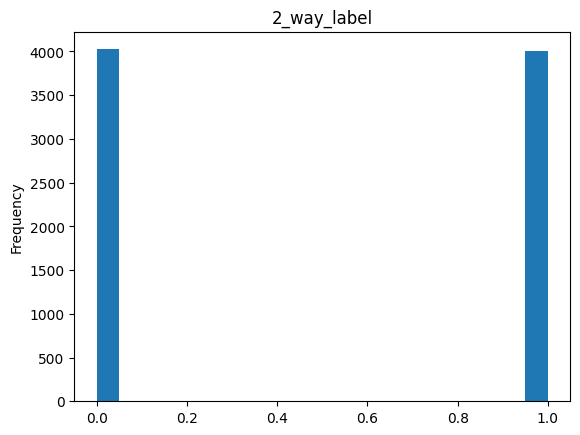

In [14]:
df_train["2_way_label"].plot(kind="hist", bins=20, title="2_way_label")
df_test["2_way_label"].plot(kind="hist", bins=20, title="2_way_label")

# Transforming Time

Set up BERT

In [15]:
# BERT is part of transformers from HuggingFace
!pip install --quiet transformers

In [16]:
# Import tokenizer to generate embeddings
from transformers import BertModel, BertTokenizer

# Import torch
import torch

# Device Variable to check for CUDA compatibility
device = "cuda" if torch.cuda.is_available() else "cpu"

model_name = "bert-base-uncased"
tokenizer = BertTokenizer.from_pretrained(model_name)
bert_model = BertModel.from_pretrained(model_name, output_hidden_states = True)

# Put the model in evaluation mode, which turns off dropout regularization which is used in training
bert_model.eval()

C:\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False

Generate embeddings

In [17]:
def get_bert_embedding(text):
    inputs = tokenizer.encode_plus(
        text, add_special_tokens=True,
        return_tensors="pt",
        max_length=80,
        truncation=True,
        padding="max_length"
    )
    
    return inputs["input_ids"].squeeze(0), inputs["attention_mask"].squeeze(0)


# Test embedding
text = "this is an embedding example for fake news detection"
input_ids, attention_mask = get_bert_embedding(text=text)
print(input_ids.shape)
print(attention_mask.shape)
print(input_ids)
print(attention_mask)

torch.Size([80])
torch.Size([80])
tensor([  101,  2023,  2003,  2019,  7861,  8270,  4667,  2742,  2005,  8275,
         2739, 10788,   102,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0])
tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0])


Pre-process Text Data

In [18]:
from torch.utils.data import Dataset, DataLoader

class TextDataset(Dataset):
    def __init__(self, dataframe, tokenizer, max_len=128):
        self.text = dataframe['clean_title'].values
        self.labels = dataframe['2_way_label'].values
        self.tokenizer = tokenizer
        self.max_len = max_len
    
    def __len__(self):
        return len(self.text)
    
    def __getitem__(self, idx):
        text = self.text[idx]
        label = self.labels[idx]
        
        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_len,
            return_token_type_ids=False,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt',
        )

        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'label': torch.tensor(label, dtype=torch.long)
        }

# Create Dataset
train_dataset = TextDataset(df_train, tokenizer)
test_dataset = TextDataset(df_test, tokenizer)

# Create DataLoader
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=True)

# Training and Evaluation

Loss function: Weighted Cross Entropy Loss with softmax activation function to return final probability
* Apply the compute_class_weight to calculate percentage values per class for a weighted CrossEntropy
* Since some classes have considerably more samples than others, all classes are weighted and taken as input into the loss calculation according to their respective number of samples  

Details
* Early stopping: Stop training if loss is increasing.
* Optimizer: Adam
* Learning rate: 1e-4
* Epochs: 10

Early Stopping Function

In [19]:
class EarlyStopping:
    def __init__(self, patience=4, verbose=False, delta=0):
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_loss = None
        self.early_stop = False
        self.delta = delta
    
    def __call__(self, val_loss, model=None):
        if self.best_loss is None:
            self.best_loss = val_loss
        elif val_loss > self.best_loss + self.delta:
            self.counter += 1
            if self.verbose:
                print(f"EarlyStopping counter: {self.counter} out of {self.patience}")
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_loss = val_loss
            self.counter = 0

Create Training Function

Usage: train_model(model, dataloader, criterion, optimizer, scheduler, num_epochs=10)

In [20]:
import torch
from tqdm import tqdm

def train_model(model, dataloader, criterion, optimizer, scheduler, num_epochs=10):
    early_stopping = EarlyStopping(patience=5, verbose=True)
    
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for batch in dataloader:
            inputs = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['label'].to(device)
            
            optimizer.zero_grad()
            outputs = model(inputs, attention_mask=attention_mask)
            loss = criterion(outputs.logits, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        epoch_loss = running_loss / len(dataloader)
        print(f"Epoch {epoch + 1}, Training Loss: {epoch_loss:.4f}")
        
        # Validation
        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for batch in dataloader:
                inputs = batch['input_ids'].to(device)
                attention_mask = batch['attention_mask'].to(device)
                labels = batch['label'].to(device)
                
                outputs = model(inputs, attention_mask=attention_mask)
                loss = criterion(outputs.logits, labels)
                val_loss += loss.item()
        epoch_val_loss = val_loss / len(dataloader)
        print(f"Epoch {epoch + 1}, Validation Loss: {epoch_val_loss:.4f}")
        
        # Early stopping
        early_stopping(epoch_val_loss, model)
        if early_stopping.early_stop:
            print("Early stopping")
            break
        
        scheduler.step()

Create Evaluation Function

Usage: evaluate_model(model, test_loader, criterion)

In [21]:
def evaluate_model(model, test_dataloader, criterion):
    model.eval()
    total_loss = 0.0

    with torch.no_grad():
        for batch in test_dataloader:
            inputs = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['label'].to(device)

            outputs = model(inputs, attention_mask=attention_mask)
            loss = criterion(outputs.squeeze(1), labels.float())

            total_loss += loss.item()

    avg_loss = total_loss / len(test_dataloader)
    return avg_loss

Define Loss Function

In [22]:
from sklearn.utils.class_weight import compute_class_weight

# Compute class weights from training labels
labels = df_train['2_way_label'].to_numpy()
# Compute weights for each class (0 and 1)
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(labels), y=labels)
class_weights = torch.tensor(class_weights, dtype=torch.float).to(device)

# For BCEWithLogitsLoss, we use pos_weight for the positive class (class 1)
# pos_weight is expected to be a tensor of size [1]
pos_weight = torch.tensor([class_weights[1]], dtype=torch.float).to(device)

Define Train Function

In [23]:
def train_model(model, train_loader, criterion, optimizer, scheduler, num_epochs):
    model.train()
    for epoch in range(num_epochs):
        for batch in tqdm(train_loader, desc=f"Epoch {epoch + 1}/{num_epochs}"):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['label'].to(device).float()

            optimizer.zero_grad()
            outputs = model(input_ids, attention_mask=attention_mask)
            loss = criterion(outputs.squeeze(), labels)
            loss.backward()
            optimizer.step()

        scheduler.step(loss)
        print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {loss.item()}")

Create model itself

In [24]:
import torch.nn as nn

class BERT_Classifier(nn.Module):
    def __init__(self, bert_model_name, num_labels=2):
        super(BERT_Classifier, self).__init__()
        self.bert = BertModel.from_pretrained(bert_model_name)
        self.dropout = nn.Dropout(0.1)  # Add a dropout layer for regularization
        self.classifier = nn.Linear(self.bert.config.hidden_size, num_labels)
    
    def forward(self, input_ids, attention_mask=None):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        pooled_output = outputs[1]  # Get the [CLS] token output
        pooled_output = self.dropout(pooled_output)  # Apply dropout
        logits = self.classifier(pooled_output)
        return logits

In [25]:
from torch.optim import lr_scheduler
from transformers import AdamW, get_scheduler
from torch.optim.lr_scheduler import ReduceLROnPlateau

# Initialize your model (note: num_classes is set to 1 for binary classification)
model = BERT_Classifier(bert_model_name='bert-base-uncased', num_labels=1)
model = model.to(device)

# Some values (will be explained later)
criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight)
optimizer = AdamW(model.parameters(), lr=1e-4)
scheduler = ReduceLROnPlateau(optimizer, min_lr=1e-5, factor=0.5, patience=1, verbose=True)
num_epochs = 3

C:\Python313\Lib\site-packages\transformers\optimization.py:640: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
C:\Python313\Lib\site-packages\torch\optim\lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


In [ ]:
train_model(model, train_dataloader, criterion, optimizer, scheduler, num_epochs)
print("\n")
evaluate_model(model, test_dataloader, criterion)

Epoch 1/3: 100%|█████████████████████████████████████████████████████████████████████| 251/251 [22:20<00:00,  5.34s/it]


Epoch 1/3, Loss: 0.3690354824066162


Epoch 2/3:   0%|                                                                               | 0/251 [00:00<?, ?it/s]

In [ ]:
torch.save(model.state_dict(), "model.pt")

# Visualize Predictions after Training

In [ ]:
Evaluation Loop

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

model.eval()  # Set the model to evaluation mode
all_preds = []
all_labels = []

with torch.no_grad():
    for input_ids, attention_mask, label, indices in test_dataloader:
        input_ids = input_ids.to(device)
        attention_mask = attention_mask.to(device)
        label = label.to(device)

        outputs = model(
              text_input_ids=input_ids,
              text_attention_mask=attention_mask
        )

        _, preds = torch.max(outputs, dim=1)
        
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(label.cpu().numpy())

Generate Confusion Matrix

In [ ]:
# Generate confusion matrix
cm = confusion_matrix(all_labels, all_preds)
class_names = ['TRUE', 'SATIRE', 'FALSE CONNECTION', 'IMPOSTER CONTENT', 'MANIPULATED CONTENT', 'MISLEADING CONTENT']

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.xticks(rotation=45)
plt.title('Confusion Matrix')
plt.show()

Visualize Percentage of False Predictions Per Class

In [ ]:
# Calculate false predictions for each class
total_per_class = np.sum(cm, axis=1)
correct_per_class = np.diagonal(cm)
false_per_class = total_per_class - correct_per_class

# Calculate percentage of false predictions per class
false_percentage_per_class = (false_per_class / total_per_class) * 100

# Display the results
for idx, class_name in enumerate(class_names):
    print(f"Class '{class_name}' - False Predictions: {false_percentage_per_class[idx]:.2f}%")

# Find class with most false predictions
max_false_class_idx = np.argmax(false_percentage_per_class)
print(f"Class with most false predictions: {class_names[max_false_class_idx]} ({false_percentage_per_class[max_false_class_idx]:.2f}%)")

Class Distribution Histogram

In [ ]:
import textwrap

def display_text_predictions(test_loader, model, device):
    """
    Displays 4 text samples per class with true labels, predicted labels, and cleaned titles.
    """
    model.eval()
    
    class_names = ['TRUE', 'SATIRE', 'FALSE CONNECTION', 'IMPOSTER CONTENT', 'MANIPULATED CONTENT', 'MISLEADING CONTENT']
    
    # Dictionary to store samples for each class
    class_samples = {i: {'correct': [], 'incorrect': []} for i in range(6)}

    # Collect samples
    with torch.no_grad():
        for input_ids, attention_mask, labels, indices in test_loader:

            clean_titles = test_loader.dataset.df.iloc[indices]['clean_title'].tolist()
            
            input_ids = input_ids.to(device)
            attention_mask = attention_mask.to(device)
            
            outputs = model(input_ids, attention_mask)
            predictions = torch.argmax(outputs, dim=1)
            
            # Store samples with their titles
            for true_label, pred_label, title in zip(labels, predictions, clean_titles):
                true_label = true_label.item()
                pred_label = pred_label.cpu().item()
                
                is_correct = true_label == pred_label
                category = 'correct' if is_correct else 'incorrect'
                
                if len(class_samples[true_label][category]) < 2:
                    class_samples[true_label][category].append((true_label, pred_label, title))
            
            if all(len(samples['correct']) == 2 and len(samples['incorrect']) == 2 
                   for samples in class_samples.values()):
                break
    
    # Display results
    for class_idx in range(6):
        print(f"\n{'='*50}\nTrue Class: {class_names[class_idx]}\n{'='*50}")

        # Display correct predictions
        print("\nCorrect Predictions:")
        for true_label, pred_label, title in class_samples[class_idx]['correct']:
            wrapped_title = "\n".join(textwrap.wrap(title, width=80))
            print(f"Predicted: {class_names[pred_label]}\nTitle: {wrapped_title}\n{'-'*50}")

        # Display incorrect predictions
        print("\nIncorrect Predictions:")
        for true_label, pred_label, title in class_samples[class_idx]['incorrect']:
            wrapped_title = "\n".join(textwrap.wrap(title, width=80))
            print(f"Predicted: {class_names[pred_label]}\nTitle: {wrapped_title}\n{'-'*50}")

# Usage
model.to(device)
display_text_predictions(test_dataloader, model, device)